In [78]:
import sys
sys.path.append('..')

import os
import pickle
import imageio
import matplotlib.pyplot as plt
import numpy as np 
import cv2 

In [5]:
with open('../embedding.pkl', 'rb') as f:
    data = pickle.load(f)

In [64]:
path = '/mnt/nvme2T/data/phantom/ros-sparse-thumbnails/images-flatten-links/train/all/2018-11-06-11-16-15_AEB_fromOfficeToBerkeley_csi_cam_front_center_image_raw-1541531777643.jpg'

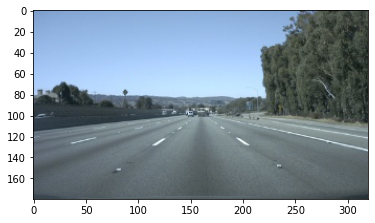

In [65]:
img = imageio.imread(path)
plt.imshow(img)

In [16]:
features_ = {k: v for k, v in zip(data['paths'], data['features'])}

In [71]:
index = data['paths'].index(path)
index = 4493

In [72]:
feature = data['features'][index]
score = np.sum(feature * data['features'], 1)
idxs = np.argsort(-score)

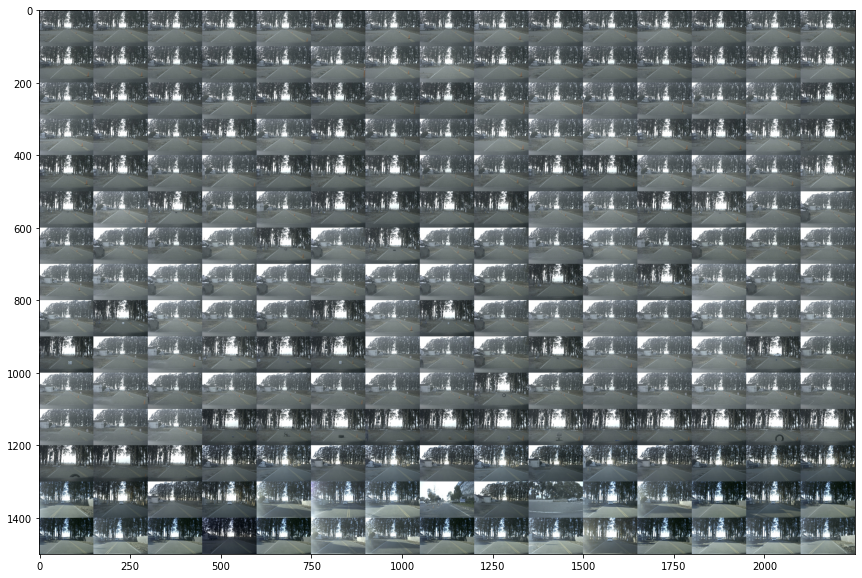

In [73]:
rows = 15
cols = 15
i = 0

images = []
for r in range(rows):
    for c in range(cols):
        img = imageio.imread(data['paths'][idxs[i]])
        img = cv2.resize(img, (150, 100))
        images.append(img)
        i += 1

images = np.stack(images, 0)
canvas = images.reshape(rows, cols, 100, 150, 3)
canvas = canvas.transpose(0, 2, 1, 3, 4).reshape(rows*100, cols*150, 3)

plt.figure(figsize=(15, 10))
plt.imshow(canvas)
plt.show()

In [67]:
try:
    index = data['paths'].index('xxx')
except:
    index = -1

In [90]:
!ls ..

checkpoint.pth.tar  embedding.pkl      main.py		   __pycache__
cifar.py	    image_embedder.py  model_best.pth.tar  README.md
data		    lib		       models		   test.py
datasets	    main2.py	       notebooks


In [101]:
import torch
import torchvision.transforms as transforms 
from PIL import Image
from easydict import EasyDict as edict 

import models
from image_embedder import get_model

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],                                
                                 std=[0.229, 0.224, 0.225])                                 

transform = transforms.Compose([                                                            
    transforms.Resize(256),                                                                 
    transforms.CenterCrop(224),                                                             
    transforms.ToTensor(),                                                                  
    normalize,                                                                              
]) 

args = edict({
    'arch': 'resnet18',
    'checkpoint': '../checkpoint.pth.tar',
})
model = get_model(args)
model.eval()

def get_feature(imgf):
    with torch.no_grad():                                                                       
        im = Image.open(imgf)                                                               
        x = transform(im)                                                                   
        feature = model(x[None, :].cuda())[0]
        
    feature = feature.detach().cpu().numpy()
    return im, feature

=> loading checkpoint '../checkpoint.pth.tar'
=> loaded checkpoint (epoch 169)


In [105]:
!ls /mnt/nvme2T/data/phantom/ros-sparse-thumbnails/images-flatten-links/train/extra

 14ee3d44ca17c6d6b5f2eba4f8c03ab7.jpg
 1.webp
 25798117-driving-through-the-end-of-tunnel.jpg
 3.webp
 800px_COLOURBOX16863742.jpg
 cars-in-a-tunnel-traffic-jam-shanghai-china-DYM96D.jpg
 conducir-en-un-tunel-848x400.jpg
 depositphotos_201985328-stock-video-blurred-car-driver-view-pov.jpg
'download (1).jpeg'
'download (2).jpeg'
 download.jpeg
 driving-tunnel-taillight-way.jpg
 e44e2d1d32742510527752d6d505320b.jpg
 Fear-of-Driving-Through-Tunnels-defeatingphobia.com_.jpeg
 Fort_McHenry_Tunnel_Bore_2.jpg
'images (1).jpeg'
'images (2).jpeg'
'images (3).jpeg'
'images (4).jpeg'
'images (5).jpeg'
 images.jpeg
 long-road-in-tunnel-driving-400x266.jpg
 maxresdefault.jpg
 Tunnel-Driving-Safety.jpg.crdownload


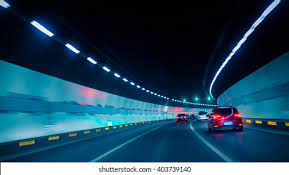

In [110]:
path = '/mnt/nvme2T/data/phantom/ros-sparse-thumbnails/images-flatten-links/train/extra'
# path = os.path.join(path, '25798117-driving-through-the-end-of-tunnel.jpg')
# path = os.path.join(path, 'Fear-of-Driving-Through-Tunnels-defeatingphobia.com_.jpeg')
path = os.path.join(path, 'download.jpeg')
im, feature = get_feature(path)
im

In [111]:
score = np.sum(feature * data['features'], 1)
idxs = np.argsort(-score)

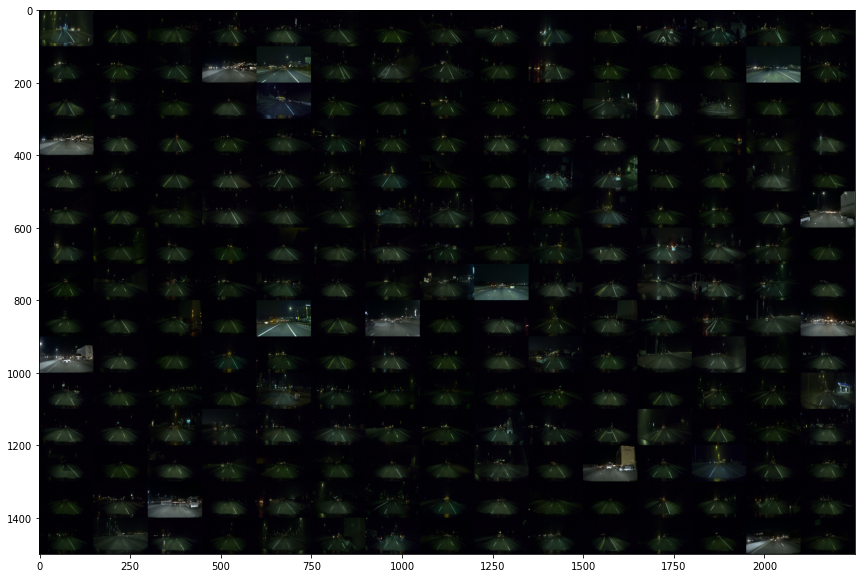

In [112]:
rows = 15
cols = 15
i = 0

images = []
for r in range(rows):
    for c in range(cols):
        img = imageio.imread(data['paths'][idxs[i]])
        img = cv2.resize(img, (150, 100))
        images.append(img)
        i += 1

images = np.stack(images, 0)
canvas = images.reshape(rows, cols, 100, 150, 3)
canvas = canvas.transpose(0, 2, 1, 3, 4).reshape(rows*100, cols*150, 3)

plt.figure(figsize=(15, 10))
plt.imshow(canvas)
plt.show()